In [1]:
import networkx as nx
import utils
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [135]:
# Graph from numerical solution
edge_list = [
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 4), (3, 5),
    (4, 7),
    (5, 6), (5, 7),
    (7, 6)
]
G = nx.Graph()
G.add_edges_from(edge_list)

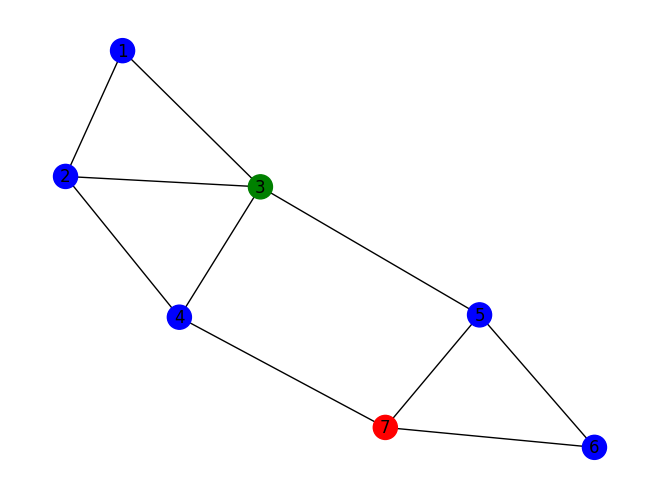

In [187]:
node_colors = ['green' if node == 3 else 'red' if node == 7 else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

In [189]:
communities, _ = utils.community_detect(G, alpha=3, beta=5, feasible=True)

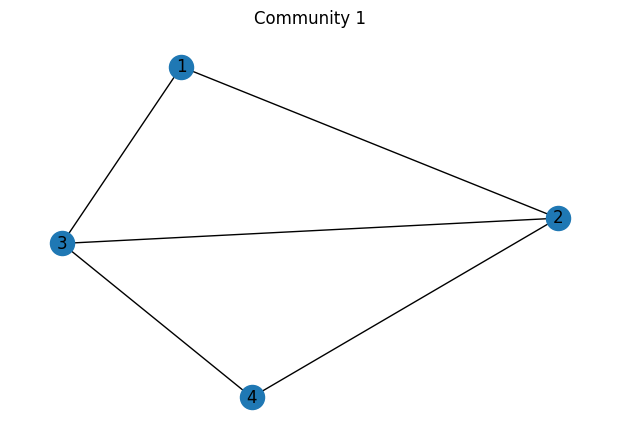

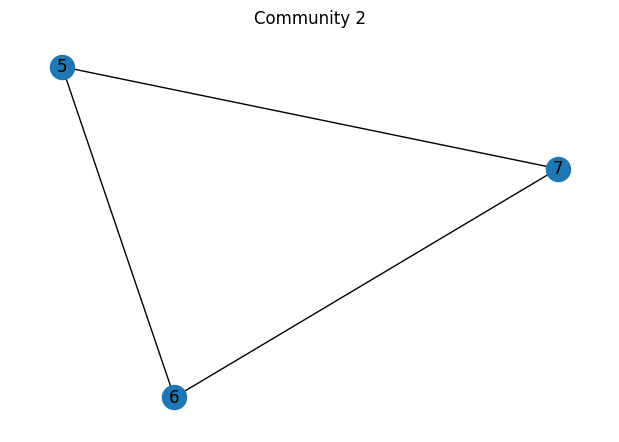

In [190]:
for i, community in enumerate(communities, start=1):
    plt.figure(figsize=(6, 4))
    nx.draw(community, with_labels=True)
    plt.title(f"Community {i}")
    plt.show()

In [191]:
# Additional graph with nice community structure
edge_list = [
    (1, 2), (1, 11), (1, 12),
    (2, 3), (2, 12),
    (3, 4), (3, 11), (3, 12),
    (4, 5), (4, 6), (4, 10),
    (5, 6),
    (6, 7),
    (7, 8), (7, 9), (7, 10),
    (8, 9), (8, 10),
    (9, 10),
    (10, 11),
    (11, 12)
]
G = nx.Graph()
G.add_edges_from(edge_list)

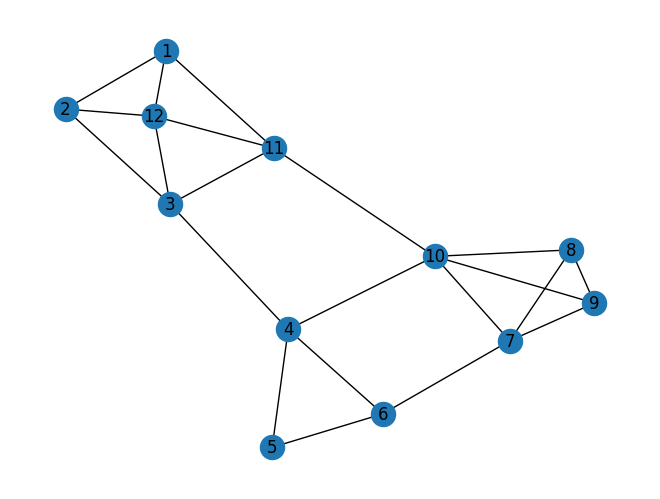

In [192]:
nx.draw(G, with_labels=True)

In [193]:
communities, _ = utils.community_detect(G, alpha=3, beta=5, feasible=True)

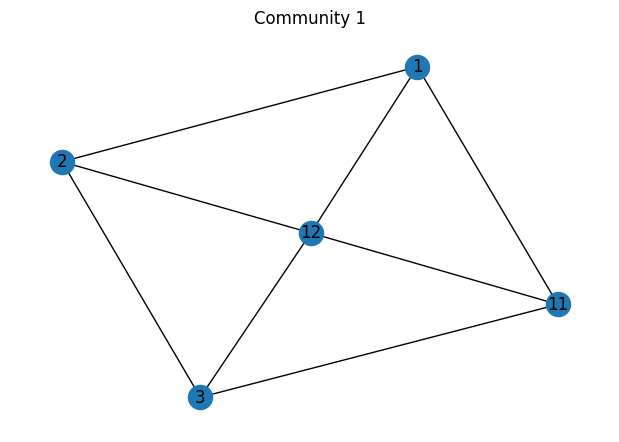

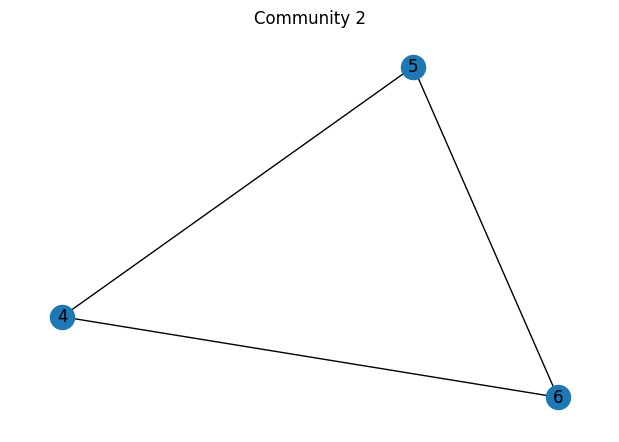

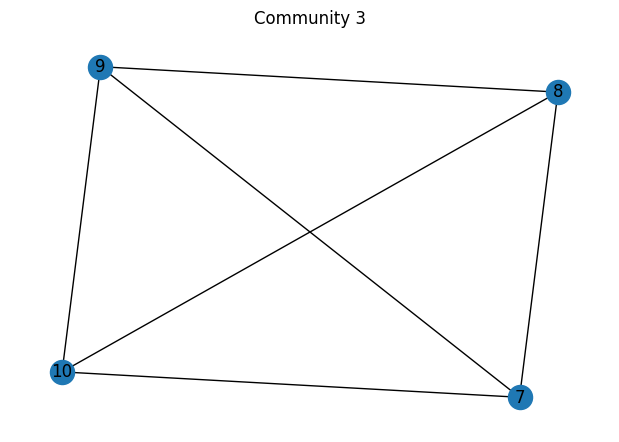

In [194]:
for i, community in enumerate(communities, start=1):
    plt.figure(figsize=(6, 4))
    nx.draw(community, with_labels=True)
    plt.title(f"Community {i}")
    plt.show()

# Simulation using SBMs

## Testing Using a 5-Block SBM

In [100]:
block_size = 5
block_sizes = [block_size] * 10

# Define the probability matrix for intra- and inter-block connections
# 0.9 for intra-block connections, 0.1 for inter-block connections
prob_matrix = [[0.9 if i == j else 0.03 for j in range(10)] for i in range(10)]

# Generate the stochastic block model graph
G = nx.stochastic_block_model(block_sizes, prob_matrix)

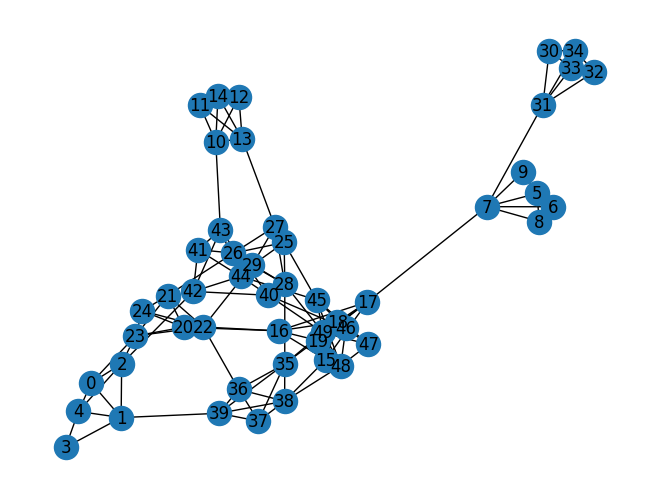

In [101]:
nx.draw(G, with_labels=True)

In [111]:
community_sequence = {}
communities, community_sequence = utils.community_detect(
    G, alpha=block_size, beta=block_size, feasible=True, level=0, community_sequence=community_sequence
)

In [112]:
community_sequence = utils.postprocess_communities(community_sequence)

In [113]:
len(communities)

10

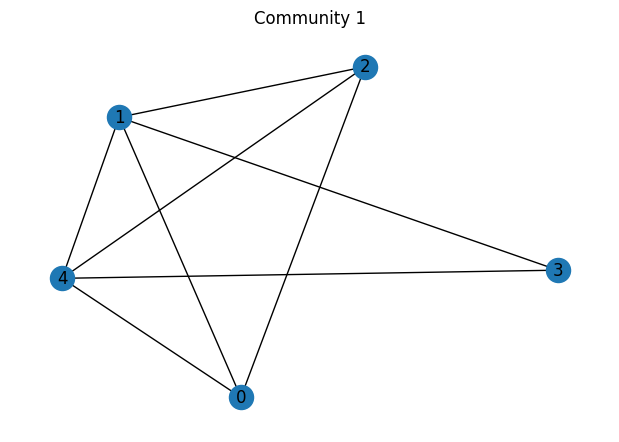

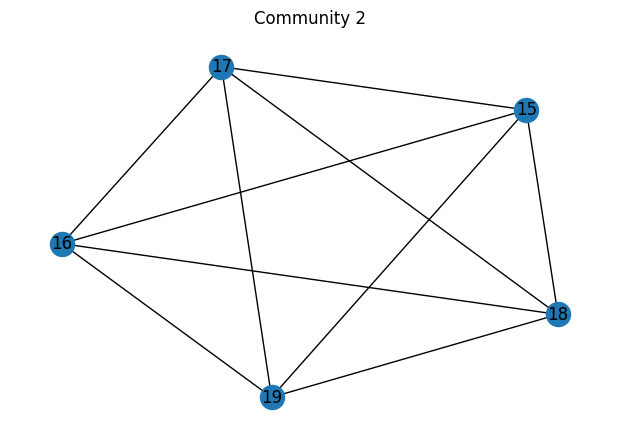

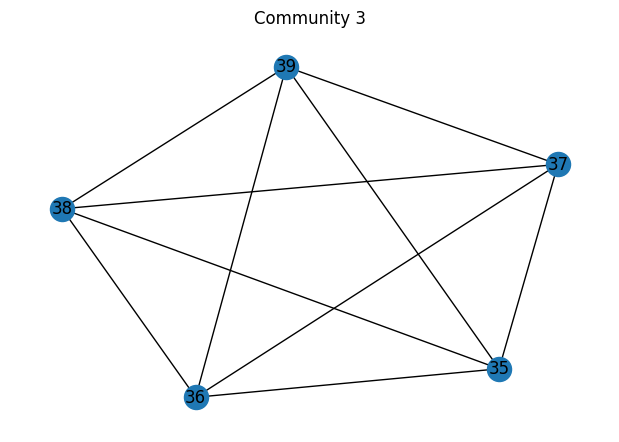

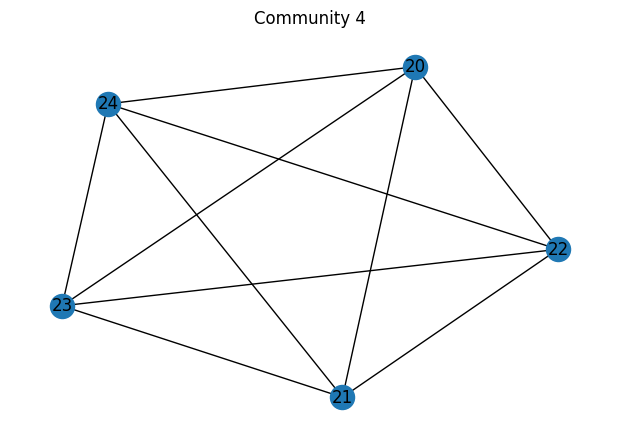

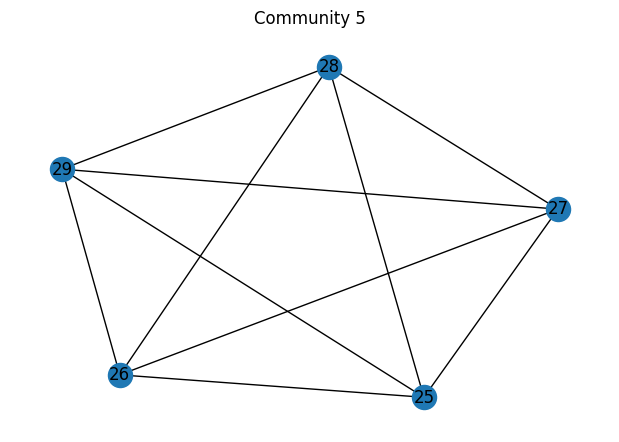

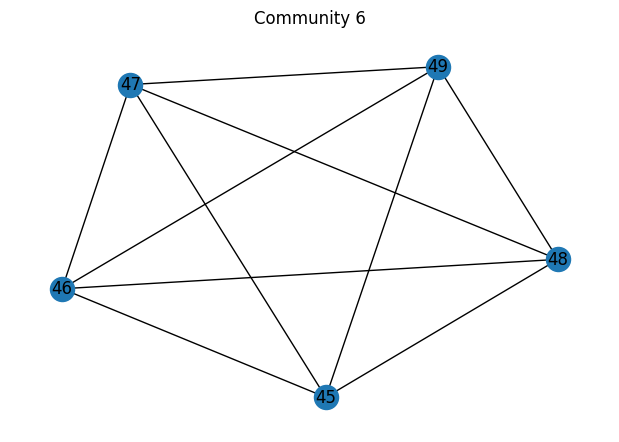

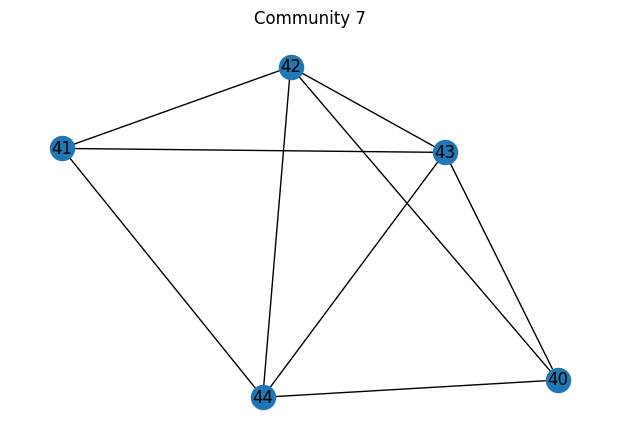

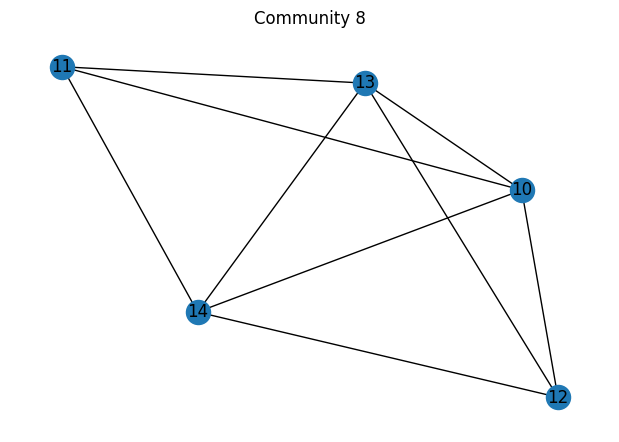

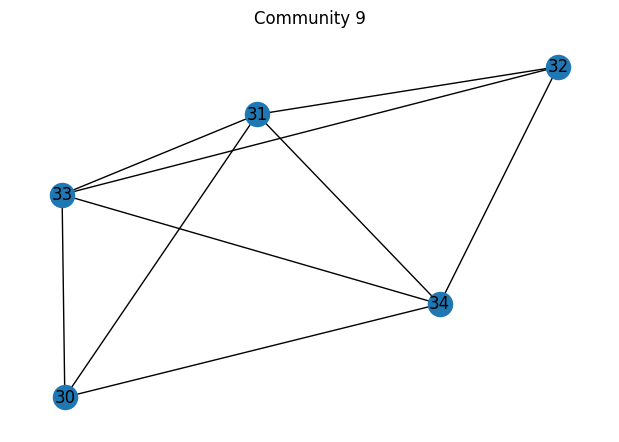

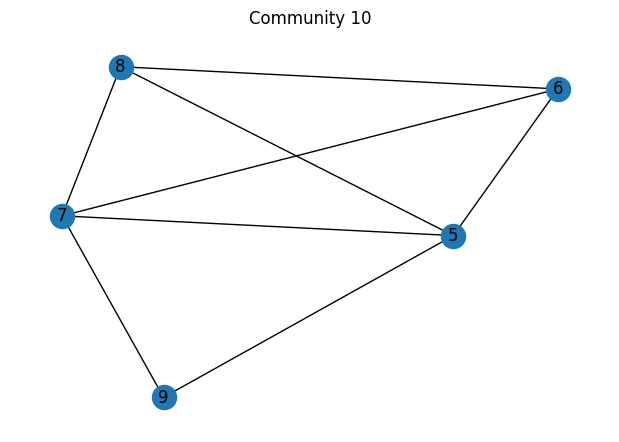

In [114]:
for i, community in enumerate(communities, start=1):
    plt.figure(figsize=(6, 4))
    nx.draw(community, with_labels=True)
    plt.title(f"Community {i}")
    plt.show()

In [117]:
clustering_map = {}
levels = len(community_sequence)

for level in range(levels):
    comms_list = community_sequence[level]
    comms = [pair[0] for pair in comms_list]
    num_comms = len(comms)
    avg_clustering = utils.avg_clustering_union(comms)
    clustering_map[num_comms] = avg_clustering

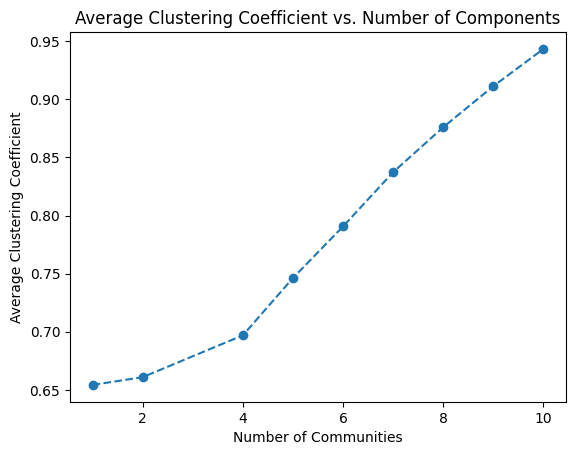

In [119]:
lists = sorted(clustering_map.items()) # sorted by key, return a list of tuples
num_comms, avg_clustering = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(num_comms, avg_clustering, linestyle='--', marker='o')
plt.xlabel('Number of Communities')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient vs. Number of Components')
plt.show()

## Trials

In [120]:
block_size = 5
block_sizes = [block_size] * 10

# Define the probability matrix for intra- and inter-block connections
# 0.9 for intra-block connections, 0.1 for inter-block connections
prob_matrix = [[0.9 if i == j else 0.03 for j in range(10)] for i in range(10)]

In [121]:
communities_map = {}
clustering_map = {}

num_trials = 3
for trial in range(num_trials):
    # Generate the stochastic block model graph
    G = nx.stochastic_block_model(block_sizes, prob_matrix)

    community_sequence = {}
    communities, community_sequence = utils.community_detect(
        G, alpha=block_size, beta=block_size, feasible=True, level=0, community_sequence=community_sequence
    )
    community_sequence = utils.postprocess_communities(community_sequence)
    
    clustering = {}
    levels = len(community_sequence)
    
    for level in range(levels):
        comms_list = community_sequence[level]
        comms = [pair[0] for pair in comms_list]
        num_comms = len(comms)
        avg_clustering = utils.avg_clustering_union(comms)
        clustering[num_comms] = avg_clustering

    communities_map[trial] = communities
    clustering_map[trial] = clustering

In [197]:
for trial in range(num_trials):
    print(f'trial {trial+1} number of communities recovered: {len(communities_map[trial])}')

trial 1 number of communities recovered: 10
trial 2 number of communities recovered: 10
trial 3 number of communities recovered: 9


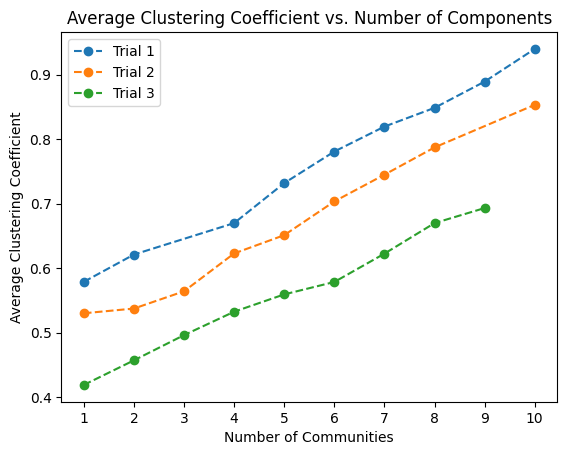

In [126]:
for trial in range(num_trials):
    clustering_seq = clustering_map[trial]
    lists = sorted(clustering_seq.items()) # sorted by key, return a list of tuples
    num_comms, avg_clustering = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(num_comms, avg_clustering, linestyle='--', marker='o', label=f'Trial {trial + 1}')

plt.xticks(np.arange(1, 11))
plt.xlabel('Number of Communities')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient vs. Number of Components')
plt.legend()
plt.show()

In [198]:
for trial in range(num_trials):
    comms_recovered = communities_map[trial]
    comms_sizes = [len(comm.nodes()) for comm in comms_recovered]
    print(f'trial {i+1} avg community size: {np.mean(comms_sizes)}')

trial 4 avg community size: 5.0
trial 4 avg community size: 5.0
trial 4 avg community size: 5.555555555555555
